# Transfer Learning with Convolutional Neural Networks

## Load Libraries and Data

In [1]:
import logging
import io
import requests
import numpy as np
import pandas as pd
from skimage import io
from skimage.util import img_as_float
from sklearn import datasets
import tensorflow as tf
from tensorflow import keras
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Restrict tensorflow output to errors
logging.getLogger('tensorflow').setLevel(logging.ERROR)

# Make this notebook's output stable across runs
random_state = 1000
np.random.seed(random_state)
tf.random.set_seed(random_state)

# Plot formatting
%matplotlib inline
sns.set()
mpl.rc('axes', labelsize=14)
mpl.rc('axes', grid=False)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [30]:
((X_train_full, y_train_full),
 (X_test, y_test)) = keras.datasets.mnist.load_data()

In [4]:
# Take random subset of data for quicker processing
sample = np.random.choice(X_train_full.shape[0], 20000)
X_train_full = X_train_full[sample]
y_train_full = y_train_full[sample]

In [31]:
X_valid = X_train_full[:4000] / 255.0
X_train = X_train_full[4000:] / 255.0
y_valid = y_train_full[:4000]
y_train = y_train_full[4000:]
X_test = X_test / 255.0 

image_dims = (28, 28, 1)

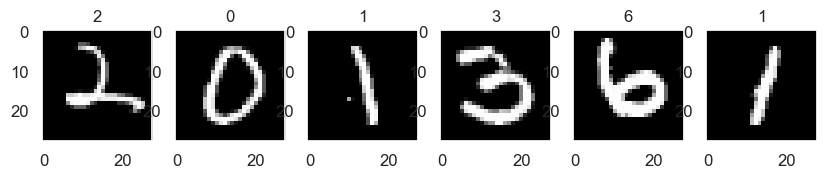

In [6]:
# Output random training instances as images
fig, ax = plt.subplots(1, 6, figsize=(10, 4))
locs = np.random.randint(0, 1000, 6)
for i, a in enumerate(ax):
    a.imshow(X_train[locs[i]], cmap='gray')
    a.set_title(y_train[locs[i]])

plt.show()

## Load CNN Trained on Fashion MNIST

In [19]:
tf.keras.backend.clear_session()
model_pretrained = keras.models.load_model('cnn_fashion_mnist.h5')

In [20]:
# Remove upper layer of pretrained model
model_transfer = keras.models.Sequential(model_pretrained.layers[:-1])

In [21]:
# Add upper layer with 10 neuronds, one per digit
model_transfer.add(keras.layers.Dense(10, activation='softmax',
                                      name='NewOutput'))

In [22]:
# Freeze lower layers of pretrained model
for layer in model_transfer.layers[:-6]:
    layer.trainable = False 

In [23]:
# Compile the new model
opt = keras.optimizers.Adam(learning_rate=0.01)
model_transfer.compile(loss='sparse_categorical_crossentropy',
                       optimizer='adam', metrics=['accuracy'])

In [24]:
model_transfer.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 256)         2

In [25]:
# Fit the model
# This model takes a while to fit
X_train = X_train.reshape(*X_train.shape, 1)
X_valid = X_valid.reshape(*X_valid.shape, 1)

history = model_transfer.fit(X_train, y_train, epochs=5, batch_size=32,
                         validation_data=(X_valid, y_valid))

Epoch 1/5


2023-03-23 13:42:06.371836: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


500/500 [==============================] - 10s 19ms/step - loss: 1.0249 - accuracy: 0.6822 - val_loss: 0.2583 - val_accuracy: 0.9202
Epoch 2/5
500/500 [==============================] - 10s 19ms/step - loss: 0.3409 - accuracy: 0.8936 - val_loss: 0.1835 - val_accuracy: 0.9425
Epoch 3/5
500/500 [==============================] - 10s 19ms/step - loss: 0.2485 - accuracy: 0.9221 - val_loss: 0.1694 - val_accuracy: 0.9455
Epoch 4/5
500/500 [==============================] - 10s 19ms/step - loss: 0.1917 - accuracy: 0.9404 - val_loss: 0.1513 - val_accuracy: 0.9515
Epoch 5/5
500/500 [==============================] - 10s 19ms/step - loss: 0.1671 - accuracy: 0.9489 - val_loss: 0.1418 - val_accuracy: 0.9550


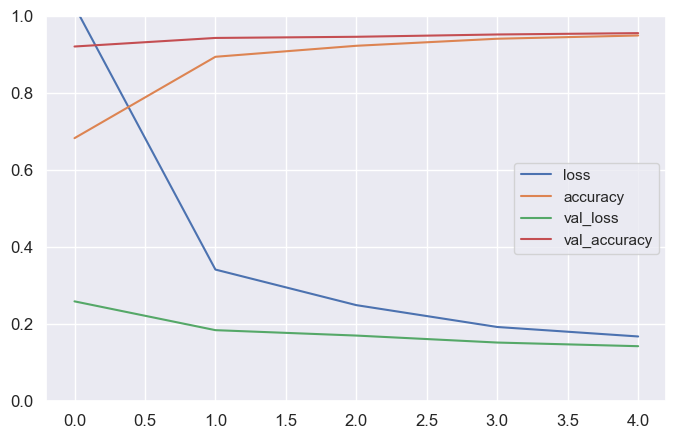

In [26]:
# Chart the learning process
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [32]:
# Evaluate on the test data
# Note that this model outperforms the dense model we examined previously
X_test = X_test.reshape(*X_test.shape, 1)
model_transfer.evaluate(X_test, y_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.1411 - accuracy: 0.9542


[0.14105896651744843, 0.954200029373169]

## Exercise

Compare the transfer learning process to that for building an MNIST digit classifier from scratch. Is transfer learning useful in this context?